# Regression Cost Function

# Regularization
## Lasso Regularization (L1)
## Ridge Regularization

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
dataset = pd.read_csv('E:\\house_full_dataset.csv')
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,4,2.5,3952,3808,2.4,1,3,3,3462,1214,1920,2007,1307317
1,5,3.5,1414,17370,1.8,0,1,5,1771,1338,1991,2019,693948
2,3,2.0,2071,15870,1.9,1,4,1,1359,900,1998,2009,899571


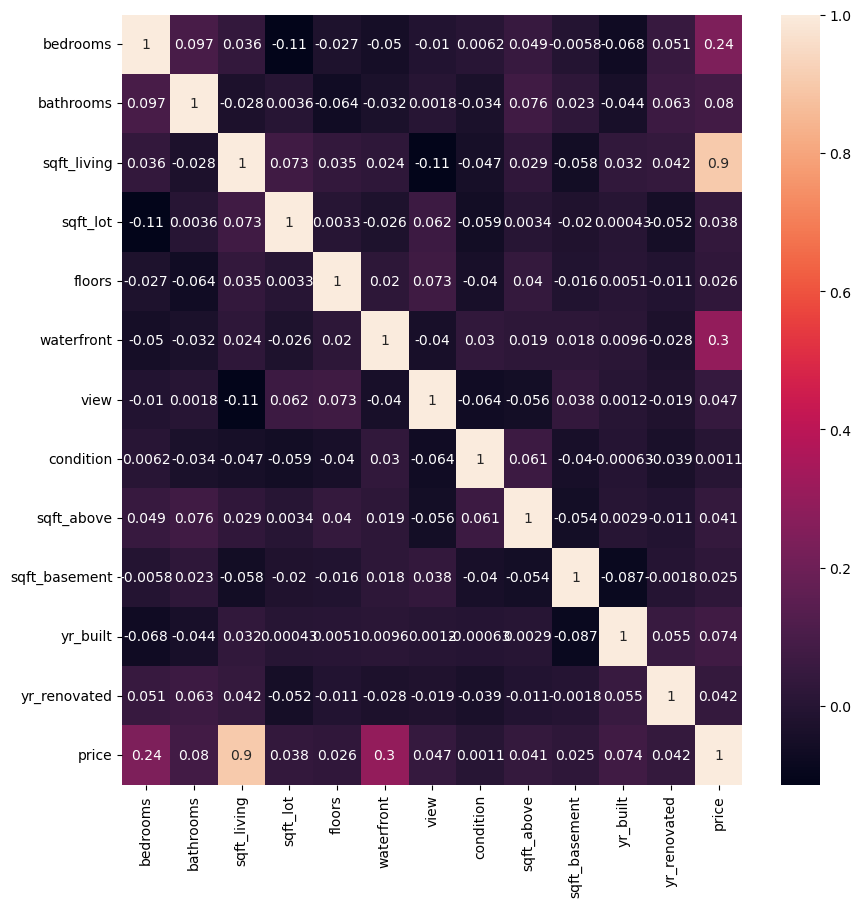

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [19]:
x = dataset.iloc[:, :-1]
y = dataset['price']

In [20]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.723079,0.034261,1.236914,-1.200093,0.700518,1.024295,0.674007,0.036794,1.511960,0.989470,-1.141547,0.187502
1,1.425097,1.168731,-0.876740,1.275496,-0.329151,-0.976281,-0.733106,1.451965,-0.328363,1.282444,0.859190,0.221498
2,0.021061,-0.532974,-0.329588,1.001688,-0.157539,1.024295,1.377564,-1.378376,-0.776745,0.247582,1.056445,0.193168
3,1.425097,1.395624,-0.548615,0.607953,0.700518,-0.976281,-0.029549,1.451965,-1.665890,-0.038304,0.690113,0.224331
4,1.425097,-0.306080,0.649788,-0.332486,0.700518,-0.976281,0.674007,-0.670791,0.926452,0.805179,1.197342,0.139340
...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.382976,1.395624,0.072655,-0.358042,-1.530431,1.024295,-1.436662,0.744380,-1.004201,1.398216,-0.747036,0.201667
496,0.021061,-1.667443,0.177589,-1.572289,-0.157539,1.024295,-1.436662,0.744380,0.078663,1.254092,-0.127089,0.187502
497,-1.382976,-1.327103,1.541719,1.523201,1.386964,1.024295,1.377564,1.451965,-0.630912,-0.768378,0.661934,0.145006
498,-1.382976,-0.986762,-1.174883,0.863689,0.185684,1.024295,-0.029549,0.036794,1.272533,-1.666203,-0.014371,0.184669


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
lr.score(x_test, y_test)*100

98.505659477657

In [27]:
lr.coef_

array([ 5.77354421e+04,  2.51540461e+04,  2.37931094e+05, -5.58388476e+02,
       -2.22487470e+03,  7.51322437e+04,  4.22100554e+04,  1.26352572e+04,
        5.88639366e+00,  1.87220179e+04,  1.79430650e+04, -1.00789878e+03])

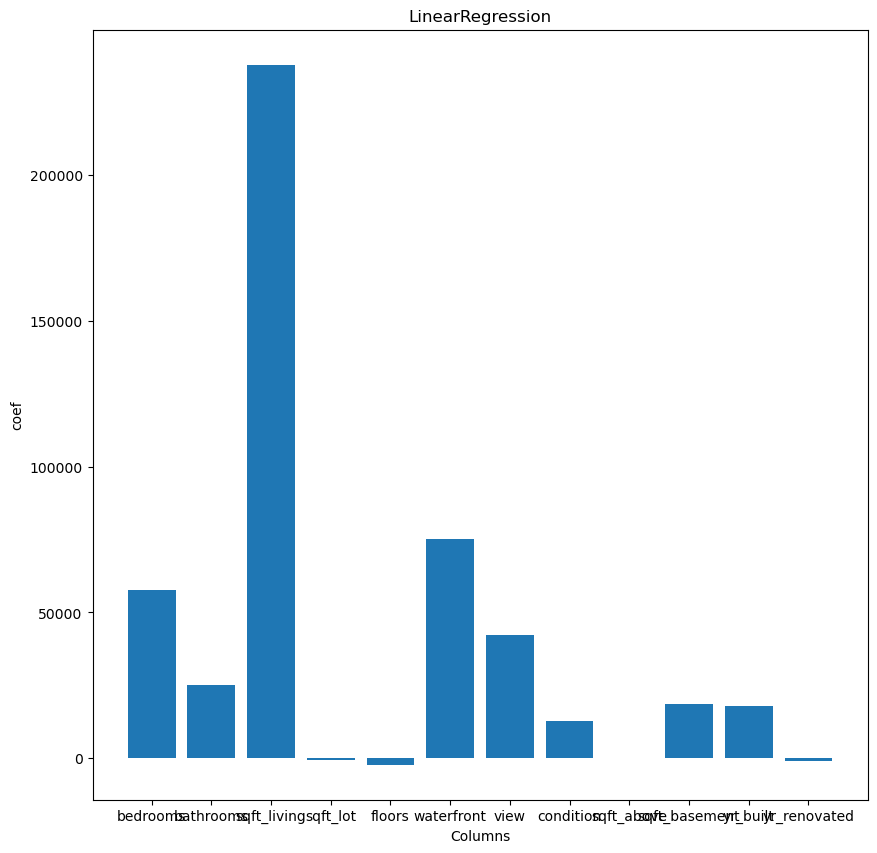

In [31]:
plt.figure(figsize=(10,10))
plt.bar(x.columns, lr.coef_)
plt.title('LinearRegression')
plt.ylabel('coef')
plt.xlabel('Columns')
plt.show()

## Lasso

In [32]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test, y_test)

0.985056526168529

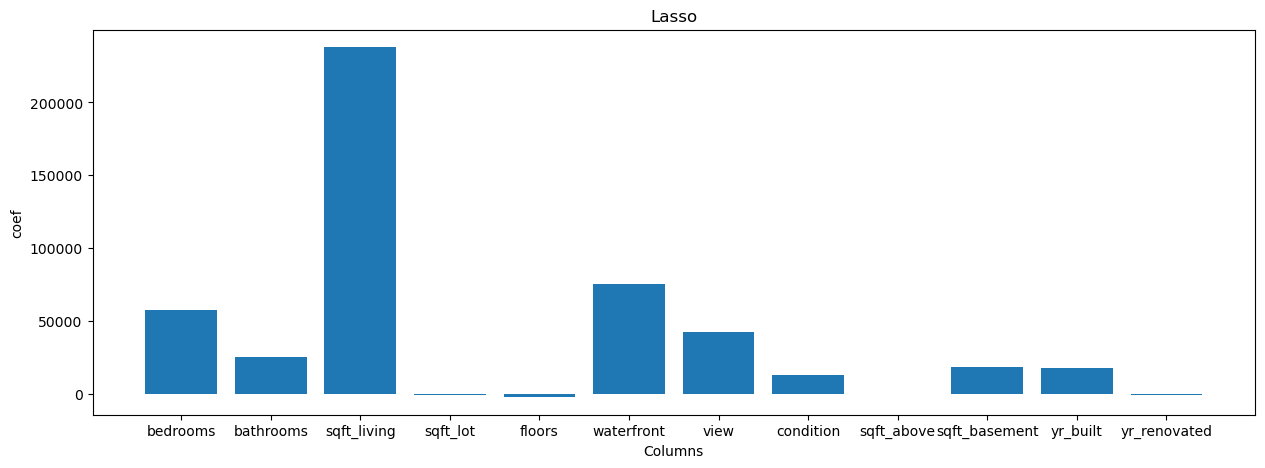

In [33]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, la.coef_)
plt.title('Lasso')
plt.xlabel('Columns')
plt.ylabel('coef')
plt.show()

## Ridge

In [34]:
ri = Ridge(alpha=10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)

0.9845579789489218

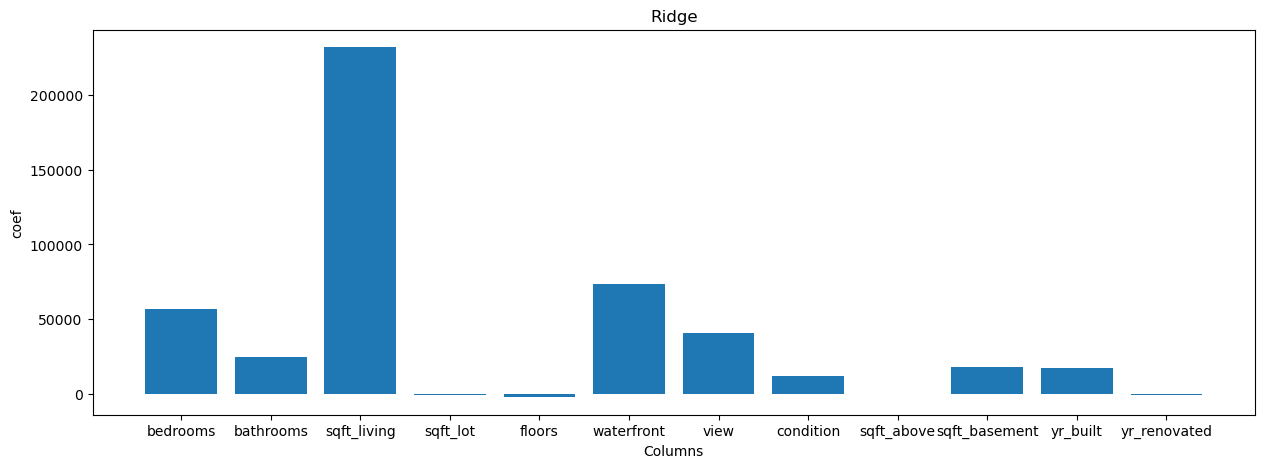

In [35]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, ri.coef_)
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('coef')
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np #

In [37]:
# for linear regression

mean_squared_error(y_test, lr.predict(x_test))


889080437.0422125

In [38]:
mean_absolute_error(y_test, lr.predict(x_test))

23959.8245587337

In [39]:
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

29817.451887145093


# Classification
We get in discrete form <br>
- Binary classification
- Multi Classification

1. Linear Models
   - Logistic Regression
   - Support vector Machines
2. Non Linear Models
   - K-Nearest Neighbours
   - SVM
   - Naive Bayes
   - Decision Tree Classification
   - Random Forest Classification

**Evaluating A Classification Model**
- Log Loss or Cross-Entropy Loss
- Confusion Matrix
- AUC-ROC curve

# Logistic Regression
**Types**
- Binomial (yes or no)
- Multinomial (more than 2)
- Ordinal (large, medium, low)

In [44]:
age = np.random.randint(18, 50, 200)
salary = np.random.randint(10000, 100000, 200)
sub = np.random.randint(0, 2, 200)
dataset = pd.DataFrame ({"age":age, "salary":salary, "subscription":sub})

In [45]:
dataset.head(3)

,age,salary,subscription
0,33,42284,0
1,34,93821,1
2,49,37675,0


Check purchase on the basis of age only

In [46]:
dataset.drop(columns=['salary'], inplace=True)

In [47]:
dataset.head()

,age,subscription
0,33,0
1,34,1
2,49,0
3,49,1
4,38,1


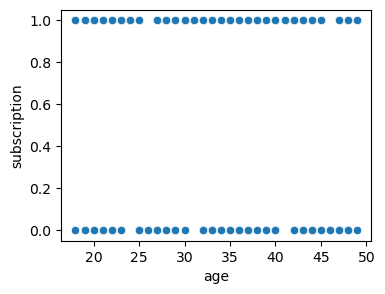

In [53]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='age', y='subscription', data=dataset)
plt.show()

In [54]:
x = dataset[['age']]
y = dataset['subscription']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [65]:
lr.fit(x_train, y_train)

LinearRegression()

In [66]:
lr.score(x_test, y_test)*100

-2.3148858713449405

In [67]:
lr.predict([[40]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.47207405])

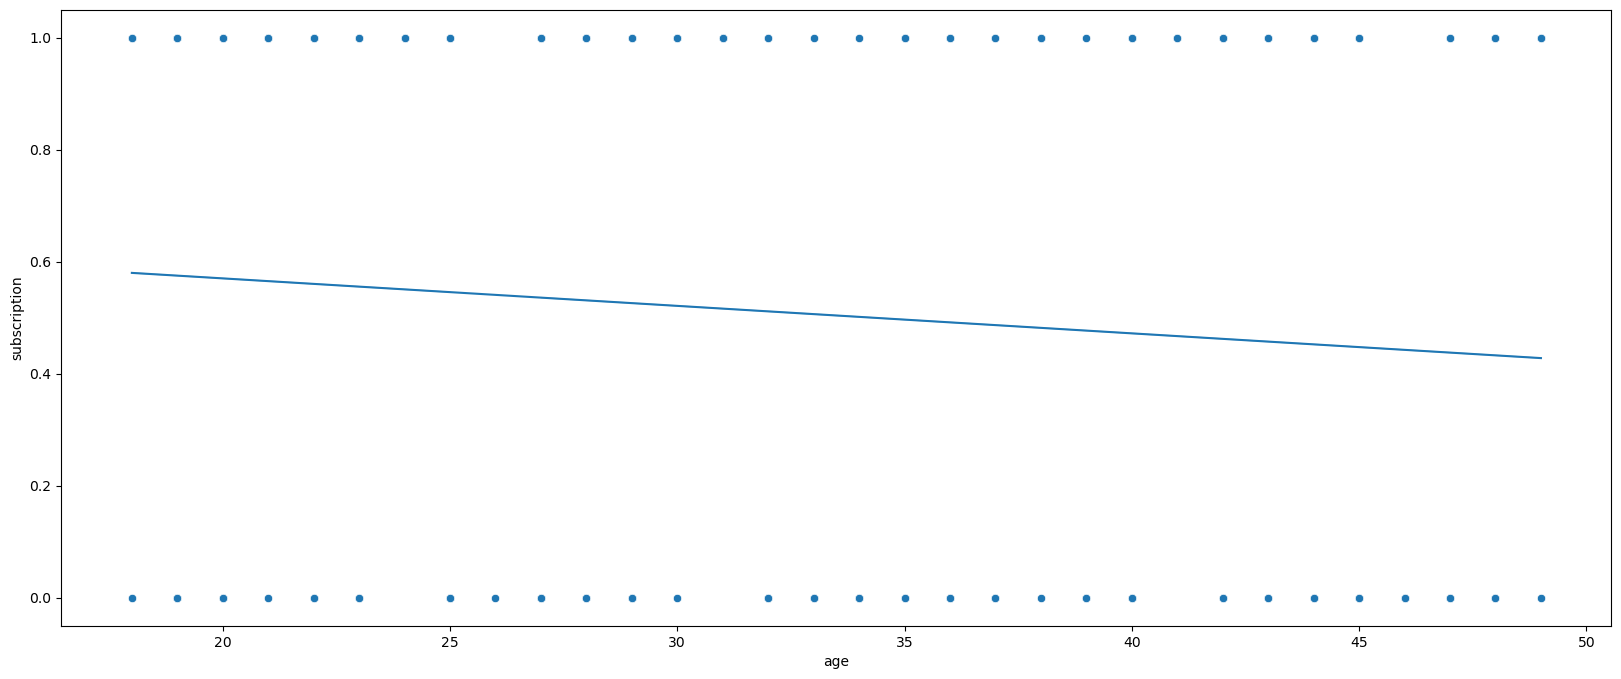

In [71]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='age', y='subscription', data=dataset)
sns.lineplot(x='age', y=lr.predict(x), data=dataset)
plt.show()

In [2]:
import pandas as pd
dataset = pd.read_csv("E:\\subscription_purchase_data.csv")
dataset.head()

,Age,Salary,Purchased
0,56,72662,1
1,46,118506,1
2,32,32688,0
3,60,45342,1
4,25,57157,0


In [3]:
new_data = dataset.drop(columns=['Salary'])

In [10]:
new = new_data.iloc[:50, :]

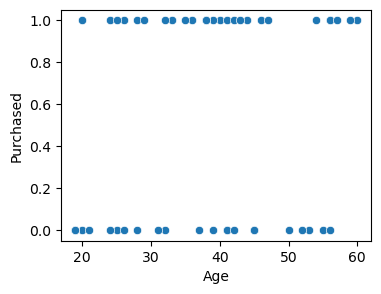

In [12]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='Purchased', data=new)
plt.show()